C:\Users\basak\AppData\Local\Temp\ipykernel_22004\1319443028.py:8: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy: 0.9473684210526315


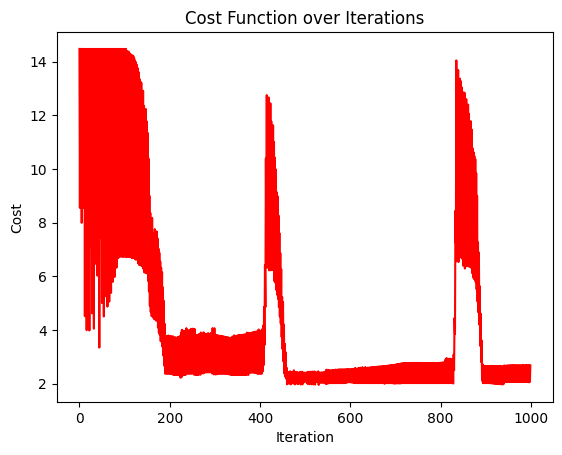

In [83]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


class LogisticRegression:

    def __init__(self, learning_rate=0.001, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.cost_history = []

    def add_bias(self, X):
        return np.hstack([np.ones((X.shape[0],1)), X])

    def fit(self, X, y):
        X_bias = self.add_bias(X)
        m, n = X_bias.shape
        self.weights = np.zeros(n)

        for i in range(self.iterations):
            predictions = self.predict(X_bias)
            gradient = -(1 / m) * np.dot(X_bias.T, (y - predictions))
            self.weights -= self.learning_rate * gradient
            self.cost_history.append(self.compute_cost(X_bias, y))

    def predict(self, X):
        return sigmoid(np.dot(X, self.weights))

    def compute_cost(self, X_bias, y):
        m = len(y)
        predictions = self.predict(X_bias)
        predictions = np.clip(predictions, 1e-10, 1 - 1e-10)  # Avoid log(0)
        cost = -(1 / m) * np.sum(
            y * np.log(predictions) + (1 - y) * np.log(1 - predictions)
        )
        return cost


# Load dataset
data = datasets.load_breast_cancer()
X, y = data.data, data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LogisticRegression(learning_rate=0.01, iterations=1000)
model.fit(X_train, y_train)

# Predict
y_prob = model.predict(model.add_bias(X_test))  # Add bias for prediction
y_pred = (y_prob >= 0.5).astype(int)  # Convert probabilities to binary classes


# Accuracy function
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


# Print accuracy
print("Accuracy:", accuracy(y_test, y_pred))

# Plot cost history
plt.plot(model.cost_history, c="r")
plt.title("Cost Function over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()